# MNIST

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [4]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True,
                          transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False,
                          transform=transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

 99%|██████████████████████████████████████████████████████████████████▎| 9805824/9912422 [00:10<00:00, 1277482.54it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



0it [00:00, ?it/s]


  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 43785.30it/s]                                                                                          

0it [00:00, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



 34%|███████████████████████▋                                             | 565248/1648877 [00:01<00:03, 289560.42it/s]
1654784it [00:01, 937372.79it/s]                                                                                       

0it [00:00, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



8192it [00:00, 14434.69it/s]                                                                                           

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!



9920512it [00:29, 1277482.54it/s]                                                                                      

In [10]:
batch_size = 100
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size,
                         shuffle=True, drop_last=True)

In [11]:
torch.cuda.is_available()

True

In [12]:
cuda = torch.device('cuda')
linear = torch.nn.Linear(784, 10, bias=True).to(device=cuda)

In [15]:
criterion = nn.CrossEntropyLoss().to(cuda)
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [17]:
training_epochs = 15
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(cuda)
        Y = Y.cuda()
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
        
    print("Epoch: {:2d}, Cost = {:.6f}".format(epoch+1, avg_cost))

Epoch:  1, Cost = 0.533481
Epoch:  2, Cost = 0.359045
Epoch:  3, Cost = 0.331458
Epoch:  4, Cost = 0.316746
Epoch:  5, Cost = 0.307011
Epoch:  6, Cost = 0.300227
Epoch:  7, Cost = 0.295044
Epoch:  8, Cost = 0.290751
Epoch:  9, Cost = 0.287296
Epoch: 10, Cost = 0.284558
Epoch: 11, Cost = 0.281965
Epoch: 12, Cost = 0.279711
Epoch: 13, Cost = 0.277802
Epoch: 14, Cost = 0.275861
Epoch: 15, Cost = 0.274475


## Test

In [24]:
# test할 떄에는 grad 계산 안 함
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28*28).float().to(cuda)
    Y_test = mnist_test.targets.to(cuda)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: {:.4f}%".format(accuracy.item()*100))

Accuracy: 89.2200%


In [20]:
## Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [25]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.data[r: r+1].view(-1, 28*28).float().to(cuda)
Y_single_data = mnist_test.targets[r: r+1].to(cuda)
print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction, 1).item()) 

Label:  7
Prediction:  7


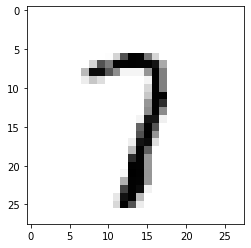

In [26]:
plt.imshow(mnist_test.data[r: r+1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show() 